# **Project 2: Analysis of 2-Node Network**   
*Group members: Jacob Silver, Justin Williams, Gregg Maloy*

This analysis will utilize the 'Github Organisations' dataset available via [Kaggle](https://www.kaggle.com/datasets/anshulmehtakaggl/github-organisations-social-network-analysis).  The 'Github organisations' dataset contains  github organisations and their contributing members.  "(Github) organisations are shared accounts where businesses and open-source projects can collaborate across many projects at once..."  Social network analysis, in this example, is used to provide insight regarding the relationship between shared organisations.  In brief the data set will be partitioned into organisation and contributor groups.  The organisation partition will be projected onto the  contributor network, with each node denoting a organisation and each edge denoting a contributor(s).  Various centrality measurements will be calculated.  Finally the water level method will be applied to successively trim the dataset and reveal the two organsations which share the most common organisations via contributors.  Analysis such this could provide insight into the interdependance between organisations.    

**Part 1: Load Packages & Data**   
For this analysis networkx and matplotlib packages were utilized.  The dataset consists of two variables 'Organisation' and 'member', with total of 9614 rows with 41 different organisations.

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

data= pd.read_csv('https://raw.githubusercontent.com/greggmaloy/Data620/main/DATA_620_Assignment_1.csv')


def glimpse(data):
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
   # for col in df.columns:
   #     print(f"$ {col} <{df[col].dtype}> {df[col].head().values}")
glimpse(data)
data.head(5)

Rows: 9614
Columns: 2


,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,None
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden


**Part 2: Data Inspection & Manipulation**


Dupicate rows then deleted. A number of contributors were listed on a first name basis, resulting in duplicate rows within the same organization. Finally a new variable was created 'count', which is sums the number of contributors for each organization, was created for downstream analysis.  

In [132]:


# remove duplicates
# some member names were first name only or were 'none' 
df = data[~data.duplicated(keep=False)]

def glimpse2(df):
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
   # for col in df.columns:
   #     print(f"$ {col} <{df[col].dtype}> {df[col].head().values}")
glimpse2(df)


df1 = pd.DataFrame({'Organisation': df['Organisation'], 'Count': 1})
grouped = df1.groupby(['Organisation'])['Count'].count()
print(grouped)
#grouped.sort_values(by='Count',ascending=False)

merged_df = df.merge(grouped, on='Organisation', how='left')
print(merged_df)

# Create the bipartite graph


Rows: 9614
Columns: 2
Organisation
Azure           1616
NVIDIA            12
airbnb            26
ansible           47
apache          1070
atom              45
aws              168
babel             70
bitcoin           28
deepmind          19
django            62
docker            18
elastic          169
ethereum          73
facebook         107
firebase          38
flutter           66
freeCodeCamp      74
golang            60
google           802
grafana           62
graphql           17
huggingface       45
jquery            65
laravel           11
microsoft       3898
mongodb           55
nodejs           363
nuxt               7
opencv            10
plotly            11
prometheus        26
python           119
pytorch           47
rails             65
reactjs          138
redis              5
reduxjs            6
serverless        38
udacity            5
vuejs             51
Name: Count, dtype: int64
     Organisation                 member  Count
0        ethereum          Ole

**Part 3: Partitioning the Data & Visualizing the Graph**   
The data was partitioned into 'Member' and 'Organisation' groups and then tested to confirm that the resulting partitions were both bi-nodal and that each node had at least one edge.  Although the dataset was confirmed to be bi-nodal, we did find some nodes which lacked edges.  These nodes will be removed during downstream analysis.  Finally the network as a whole was graphed.  The red nodes in the graph represent organisations, while the blue nodes represent contributors. Edges, in this graph, represent common contributors.  The graph displays that some organisations have many more contributors than others, but not much more.  We will need to trim the dataset, but first we will calculate centrality measurements.

False
True


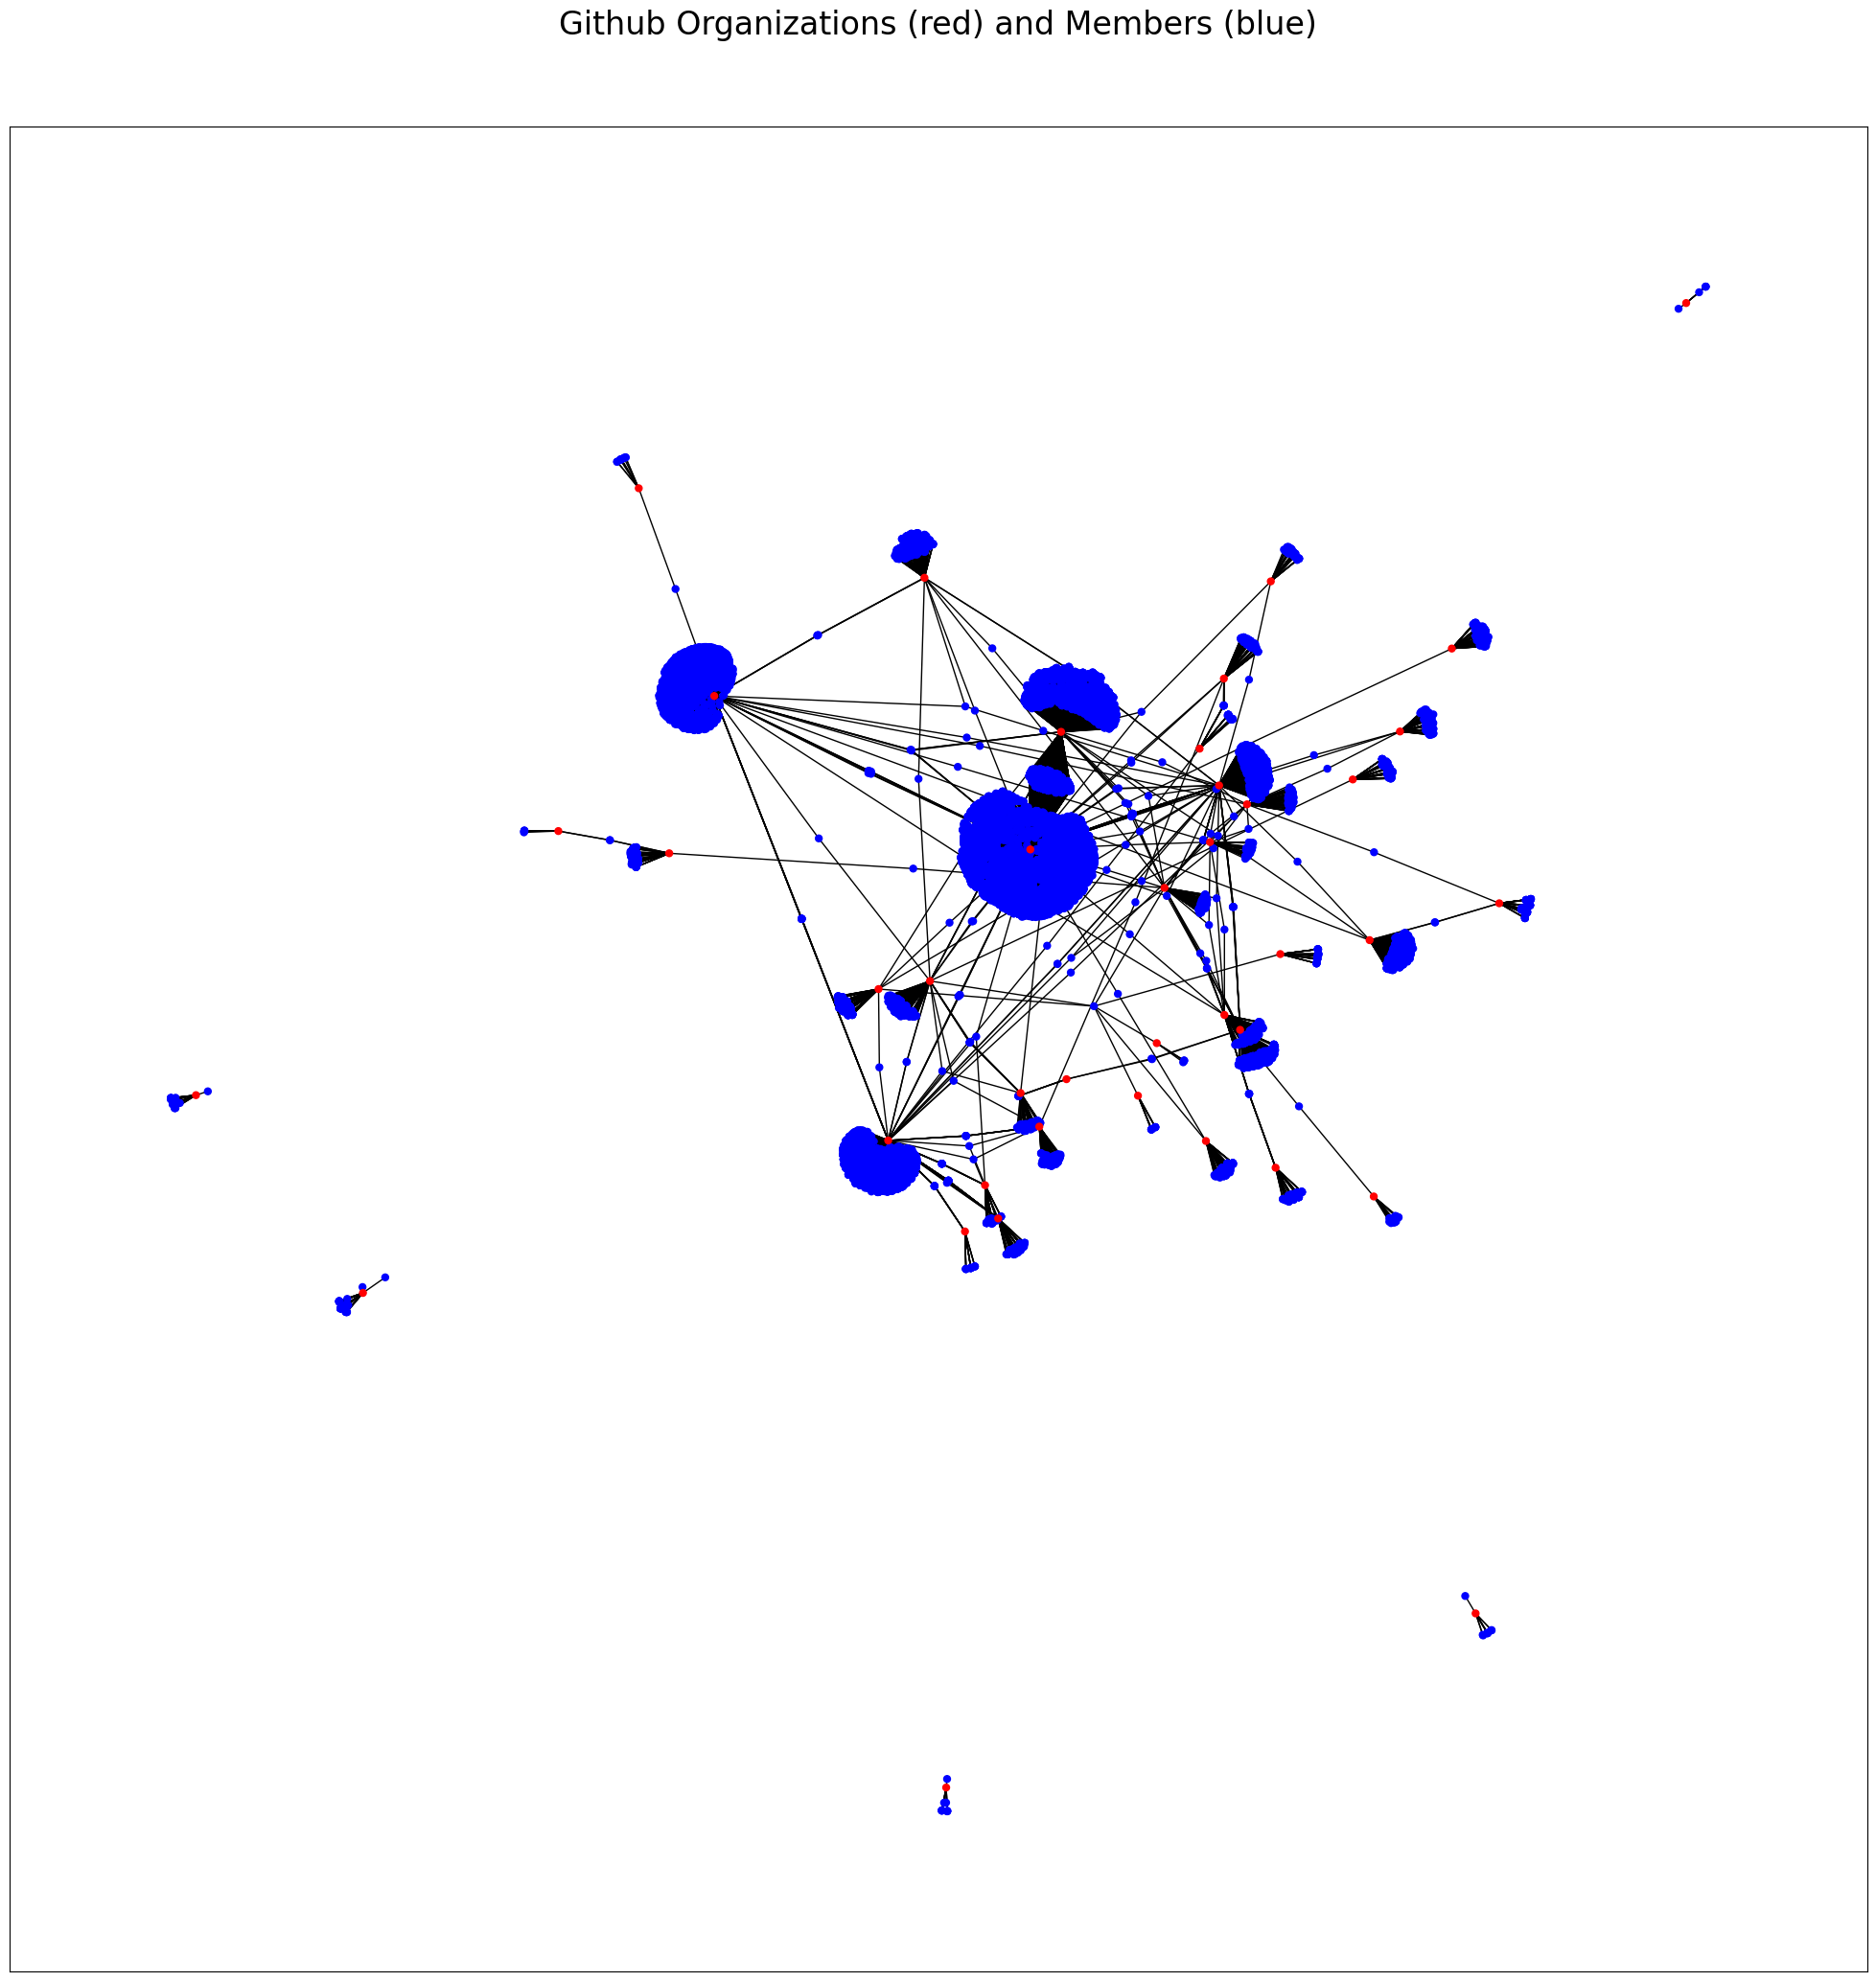

In [133]:
#Create the bipartite graph
graph = nx.Graph()


    
plt.show()
graph.add_nodes_from(merged_df['member']      ,bipartite=1, with_labels=False)
graph.add_nodes_from(merged_df['Organisation'],bipartite=0, with_labels=False)
#tesing data- for each node there is at least one edge
print(nx.is_connected(graph))

#Returns True if graph G is bipartite, False if not.
print(nx.is_bipartite(graph)) 
node_colors = ['blue' if node_type == 1 else 'red' for node_type in nx.get_node_attributes(graph, 'bipartite').values()]

for i in range(len(df)):
  graph.add_edges_from([(df.iloc[i,1],df.iloc[i,0])])

plt.figure(figsize=(25,25))
plt.text(0.5, 1.05, "Github Organizations (red) and Members (blue)", fontsize=24, ha='center', transform=plt.gca().transAxes)
nx.draw_networkx(graph, with_labels=False, node_size=25,node_color=node_colors)
plt.show()


   

***Part 4: Centrality Calculations***    
Below unweighted centrality scores are calculated and sorted by degree. A sentence or two summing up this table.  

In [140]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


#centrality calculations

W  = bipartite.projected_graph(graph, merged_df['Organisation'])
C  = nx.closeness_centrality(W) 
B  = nx.betweenness_centrality(W) 
D  = nx.degree_centrality(W)
E  = nx.eigenvector_centrality(W)
#weighted
#W_weighted = bipartite.weighted_projected_graph(graph, merged_df['Organisation'])
#C_weighted  = nx.closeness_centrality(W2) 
#B_weighted  = nx.betweenness_centrality(W2) 
#D_weighted  = nx.degree(W2)
#E_weighted  = nx.eigenvector_centrality(W2)
#degee_cent=nx.degree_centrality(df)


data = []
for w in merged_df['Organisation']:
    Organisation_degree = W.degree(w)
    #Organisation_degree_weighted = W_weighted (w, weight='weight')
    Closeness_value = C[w]
    #Closeness_value_weighted=C_weighted[w]
    Betweeness=B[w]
    #Betweeness_weighted=B_weighted[w]
    Degree=D[w]
    #Degree_weighted=D_weighted[w]
    Eigenvector=E[w]
    #Eigenvector_weighted=E_weighted[w]
    
    data.append((w 
                 ,Organisation_degree#,Organisation_degree_weighted
                 ,Closeness_value#, Closeness_value_weighted      
                 ,Betweeness#, Betweeness_weighted
                 ,Degree#,Degree_weighted
                 ,Eigenvector#,Eigenvector_weighted
                ))

df1 = pd.DataFrame(data, columns=["Organisation"
                                 ,"Degree"#,"Degree_Weighted"
                                 ,"Closeness"#,"Closeness Centrality Weighted"
                                 ,"Betweeness"#,"Betweenness Centrality Weighted"
                                 ,"Degree_Cent"#,"Degree Centrality Weighted"
                                 ,"Eigenvector"#,"Eigenvector_weighted"
                                ]
                                )

#print(df1.to_string(index=False))

#final_df = merged_df.merge(df1, on=['Organisation','member'], how='left')


final_df = merged_df[['Count','Organisation']].merge(df1, on='Organisation', how='left')
final_df = final_df[[ 'Organisation'
                     , 'Degree'
                     ,'Count'#,'Degree_Weighted'
                     , 'Closeness'#,'Closeness Centrality Weighted'
                     , 'Betweeness'#,'Betweenness Centrality Weighted'
                     , "Degree_Cent"#,'Degree Centrality Weighted'
                     ,'Eigenvector']]#,'Eigenvector_weighted']]
final_df = final_df.drop_duplicates()
sorted_df = final_df.sort_values(by='Degree', ascending=False)
print(sorted_df.to_string(index=False))

Organisation  Degree  Count  Closeness  Betweeness  Degree_Cent  Eigenvector
   microsoft      18   3898   0.567130    0.186981        0.450 3.525066e-01
       babel      16     70   0.556818    0.173644        0.400 3.465295e-01
      nodejs      14    363   0.528017    0.067474        0.350 3.046721e-01
      python      14    119   0.502049    0.098262        0.350 2.971577e-01
      google      13    802   0.502049    0.142701        0.325 2.537615e-01
      apache      11   1070   0.486111    0.073070        0.275 2.467712e-01
       Azure      11   1616   0.464015    0.028991        0.275 2.671528e-01
freeCodeCamp      10     74   0.464015    0.018431        0.250 2.614398e-01
      jquery       8     65   0.443841    0.041638        0.200 1.826265e-01
    facebook       8    107   0.443841    0.089103        0.200 1.693380e-01
     mongodb       7     55   0.419521    0.004150        0.175 1.817362e-01
        atom       6     45   0.431338    0.003329        0.150 1.712340e-01

***Part 5: Island Method***    
The island method was then applied in order to trim the dataset to the relationships of interest.  Here we applied the island methodology on the 'degree' calculation, starting with water level 1 degree, which will trim the dataset of nodes with no edges, leaving only a interconnected main network.  Next we raised the water level to degrees 6, 9, 14 and 16.  A water level of 16 will trim the dataset to the two nodes(organisations) of the highest degrees (microsoft=17 and babel=16).  

In the below graphs, the nodes, denoted in red, are organizations and the edges are contributing members of each organisation. 

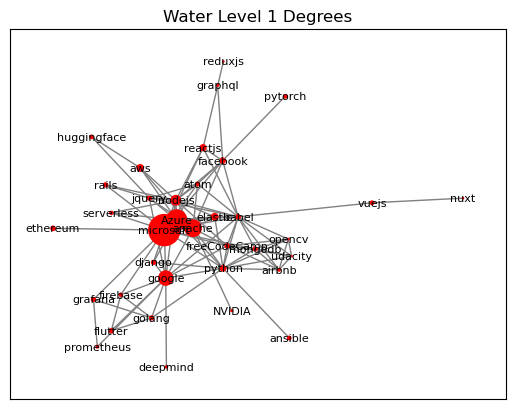

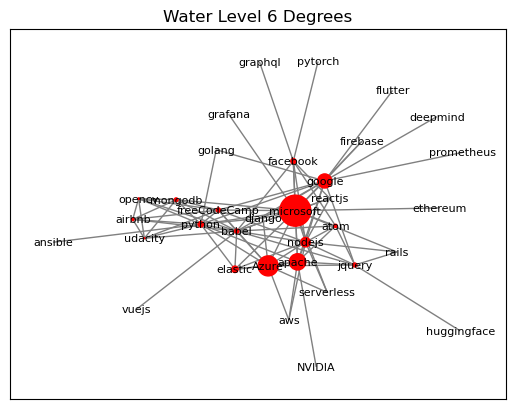

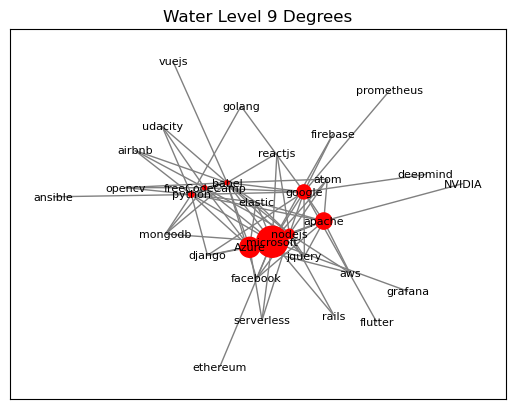

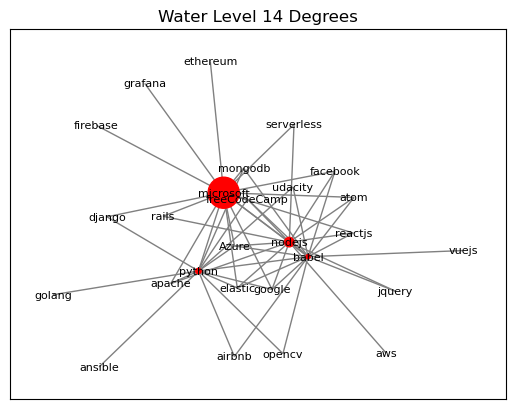

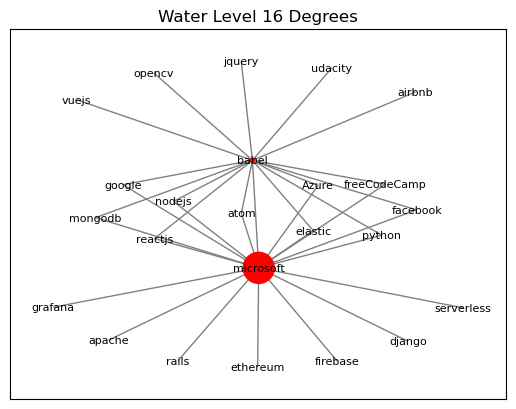

In [136]:
#make df for water levels
greater_than1=sorted_df.loc[sorted_df['Degree']>=1]
greater_than6=sorted_df.loc[sorted_df['Degree']>=6]
greater_than9=sorted_df.loc[sorted_df['Degree']>=9]
greater_than14=sorted_df.loc[sorted_df['Degree']>=14]
greater_than16=sorted_df.loc[sorted_df['Degree']>=16]

#########################################################################degree>=  1
W0  = bipartite.projected_graph(graph, greater_than1['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than1['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W0, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than1[greater_than1['Organisation'].isin(island)]
    dfs.append(island_df)
    
    


# Create a new graph whater level 6
level_1_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_1_graph.add_edges_from(W0.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_1_graph)

# Get the count values for each node
count_values = greater_than1.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_1_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_1_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 1 Degrees")

# Display the plot
plt.show()



#########################################################################degree>=  6
W1  = bipartite.projected_graph(graph, greater_than6['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than6['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W1, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than6[greater_than6['Organisation'].isin(island)]
    dfs.append(island_df)
    
    


# Create a new graph whater level 6
level_6_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_6_graph.add_edges_from(W1.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_6_graph)

# Get the count values for each node
count_values = greater_than6.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_6_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_6_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 6 Degrees")

# Display the plot
plt.show()


###################################################################degree>= 9
#degree>=  9
W2  = bipartite.projected_graph(graph, greater_than9['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than9['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W2, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than9[greater_than9['Organisation'].isin(island)]
    dfs.append(island_df)
    
level_9_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_9_graph.add_edges_from(W2.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_9_graph)

# Get the count values for each node
count_values = greater_than9.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_9_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_9_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 9 Degrees")

# Display the plot
plt.show()

#################################################################water level >=14
#degree>=  14
W3  = bipartite.projected_graph(graph, greater_than14['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than14['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W3, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than14[greater_than14['Organisation'].isin(island)]
    dfs.append(island_df)


# Create a new graph to combine all islands
level_14_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_14_graph.add_edges_from(W3.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_14_graph)

# Get the count values for each node
count_values = greater_than14.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_14_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_14_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 14 Degrees")

# Display the plot
plt.show()



#########################################water level>= 16

# degree >= 16
W4 = bipartite.projected_graph(graph, greater_than16['Organisation'])

# Apply the island method
islands = []
visited = set()
for node in greater_than16['Organisation']:
    if node not in visited:
        island = nx.node_connected_component(W4, node)
        islands.append(island)
        visited.update(island)

# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than16[greater_than16['Organisation'].isin(island)]
    dfs.append(island_df)

# Create a new graph to combine all islands
level_16_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_16_graph.add_edges_from(W4.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_16_graph)

# Get the count values for each node
count_values = greater_than16.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_16_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_16_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 16 Degrees")

# Display the plot
plt.show()

***Part 6: Island Method Commentary***   

***Part 7: Conclusion***   
This is a conclusion...........

In [ ]:
BELOW ARE I GRAPHED OTHER CENTRALITIES TO SEE IF THEY WERE MORE USEFUL THAN DEGREE

***********Below I though betweeness centrality might be more usefult to graph than degree. Doesn't really seem so.  

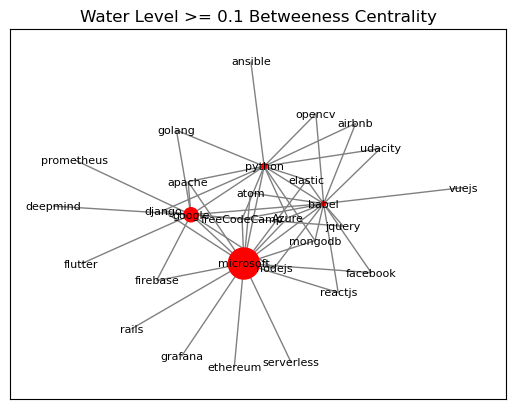

In [137]:

###################################################################degree>= 9
#betweeness>=  1.5

greater_than15=sorted_df.loc[sorted_df['Betweeness']>=.09]
WZ  = bipartite.projected_graph(graph, greater_than15['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than15['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(WZ, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than15[greater_than15['Organisation'].isin(island)]
    dfs.append(island_df)
    
level_15_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_15_graph.add_edges_from(WZ.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_15_graph)

# Get the count values for each node
count_values = greater_than15.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_15_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_15_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level >= 0.1 Betweeness Centrality")



# Display the plot
plt.show()

The data is dominated by microsoft, apache and azure contributors. Below i graph based on number of contributors since the dataset is 80%-70% of the dataset is made up of three groups. not really useful tho 

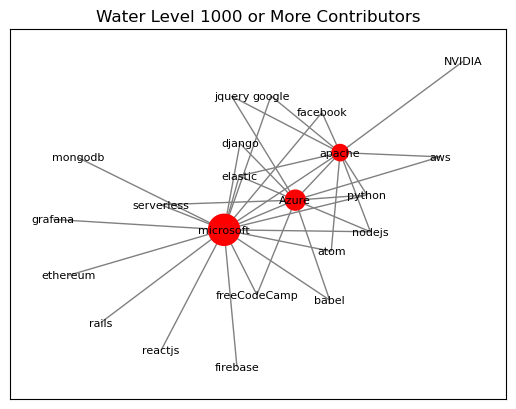

In [143]:
greater_than1000=sorted_df.loc[sorted_df['Count']>=1000]
# degree >= 16
WQ = bipartite.projected_graph(graph, greater_than1000['Organisation'])

# Apply the island method
islands = []
visited = set()
for node in greater_than1000['Organisation']:
    if node not in visited:
        island = nx.node_connected_component(WQ, node)
        islands.append(island)
        visited.update(island)

# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than1000[greater_than1000['Organisation'].isin(island)]
    dfs.append(island_df)

# Create a new graph to combine all islands
level_1000_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_1000_graph.add_edges_from(WQ.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_1000_graph)

# Get the count values for each node
count_values = greater_than1000.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_1000_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_1000_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 1000 or More Contributors")

# Display the plot
plt.show()